# Numerical Computing and Simulation

## Find number of digits

**Problem:** Write a function, where the input is an integer and the output is the number of digits of this number.

In [49]:
# Method 1

from math import log, floor
def find_nbr_of_digits_1(an_int) :
    try:
        return floor(log(an_int, 10)) + 1
    except :
        return 1    

## test
print(find_nbr_of_digits_1(12345))
print(find_nbr_of_digits_1(2 ** 10))
print(find_nbr_of_digits_1(0))

5
4
1


In [50]:
# Method 2

def find_nbr_of_digits_2(an_int) :
    c = 0
    while True :
        an_int = an_int // 10
        c = c + 1
        if an_int == 0 :
            break
    return c

## test
print(find_nbr_of_digits_2(12345))
print(find_nbr_of_digits_2(2 ** 10)) 
print(find_nbr_of_digits_2(0))   

5
4
1


## The first Fibonacci number greater than m
 
**Problem:** Let F_n be the n-th Fibonacci number. Find n, such that F_n >= m, where m >= 1.

In [51]:
def find_fibo_index(m) :
    f1 = 1
    f2 = 1
    i = 2
    if m == 1 :
        return 1
    else:
        while True:
            f = f1 + f2
            i = i + 1
            if f >= m :
                break
            f1 = f2
            f2 = f
        return i

## test
print(find_fibo_index(10000))
print(find_fibo_index(1))
print(find_fibo_index(2))

21
1
3


## Long division

**Problem:** Find n / d, where both n and d are integers but d cannot be 0.

In [52]:
def long_div(n, d) :
    q_list = list()
    r_list = list()
    # initial
    q = n // d
    r = n % d
    q_list.append(q)
    r_list.append(r)
    if r == 0 :
        return [[q, r], ['No repeat']]
    else :
        c = 0
        while True :
            n = 10 * r
            q = n // d
            r = n % d
            q_list.append(q)
            r_list.append(r)
            c = c + 1
            if (r in r_list[:c]) or r == 0 :
                break
        if r_list[-1] == 0 :
            the_re = [q_list, ['No repeat']]
        else :
            m = len(r_list)
            for i in range(m - 1) :
                if r_list[i] == r_list[-1] :
                    the_re = [q_list, {"Repeat starts position": i + 2}] 
                    break
        return the_re

## test
print(long_div(1, 2))
print(long_div(1, 3))
print(long_div(1, 6))
print(long_div(1, 7))
print(long_div(20, 2))
print(long_div(20, 3))
print(long_div(20, 6))
print(long_div(20, 7))
print(long_div(199, 23))

[[0, 5], ['No repeat']]
[[0, 3], {'Repeat starts position': 2}]
[[0, 1, 6], {'Repeat starts position': 3}]
[[0, 1, 4, 2, 8, 5, 7], {'Repeat starts position': 2}]
[[10, 0], ['No repeat']]
[[6, 6], {'Repeat starts position': 2}]
[[3, 3], {'Repeat starts position': 2}]
[[2, 8, 5, 7, 1, 4, 2], {'Repeat starts position': 2}]
[[8, 6, 5, 2, 1, 7, 3, 9, 1, 3, 0, 4, 3, 4, 7, 8, 2, 6, 0, 8, 6, 9, 5], {'Repeat starts position': 2}]


## Frequency of digits in a large number

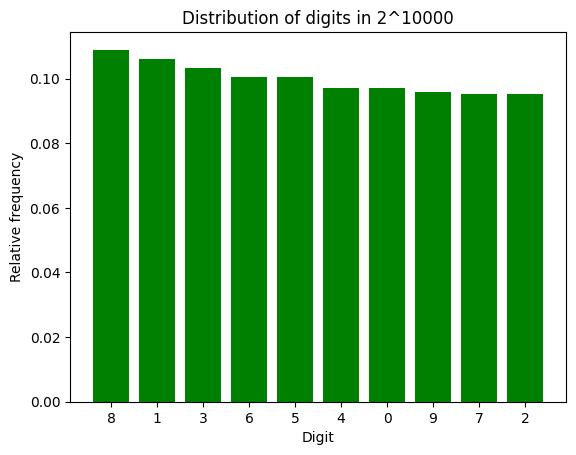

In [53]:
import matplotlib.pyplot as plt

def ordered_bar_plot(a, n) :
    nbr = a ** n
    s = str(nbr)
    freq = dict()
    
    for ch in s :
        freq[ch] = freq.get(ch, 0) + 1

    li = list()
    for key, value in list(freq.items()) :
        li.append((value, key))
    li.sort(reverse = True)

    total_freq = sum(freq.values())
    
    new_d = dict()
    for v, k in li :
        new_d[k] = v / total_freq
    
    plt.bar(new_d.keys(), new_d.values(), color='g')
    plt.xlabel('Digit')
    plt.ylabel('Relative frequency')
    plt.title('Distribution of digits in %d^%d' % (a, n))
    plt.show()

# test
ordered_bar_plot(2, 10000)


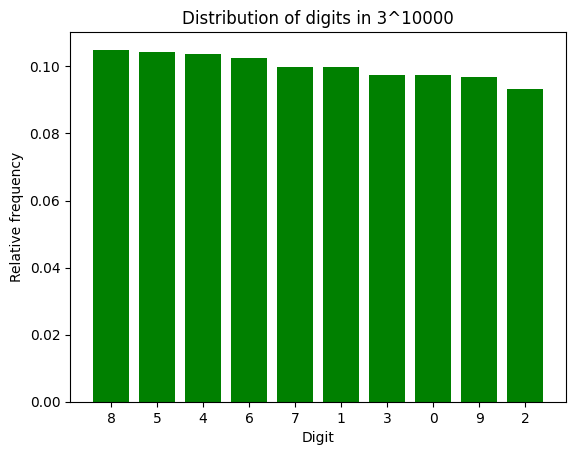

In [54]:
from sys import set_int_max_str_digits
set_int_max_str_digits(7000)
ordered_bar_plot(3, 10000)

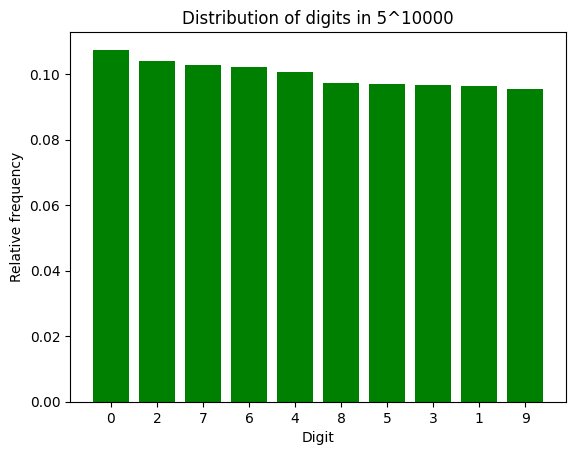

In [55]:
ordered_bar_plot(5, 10000)

## Recursive programming

In [56]:
# Example: Factorial
def my_factorial(n) :
    if n == 0 :
        return 1
    else :
        return n * my_factorial(n - 1)
## test
for i in range(4) :
    print(i, my_factorial(i))
print(10, my_factorial(10))

0 1
1 1
2 2
3 6
10 3628800


In [57]:
# Example: Tribonacci numbers --- https://oeis.org/A000073
def tribonacci(n) :
    if n == 0 or n == 1 :
        return 0
    elif n == 2 :
        return 1
    else :
        return tribonacci(n-1) + tribonacci(n-2) + tribonacci(n-3)

## test
for i in range(6) :
    print(i, tribonacci(i))
        
        

0 0
1 0
2 1
3 1
4 2
5 4


## Simulation of coin tosses 

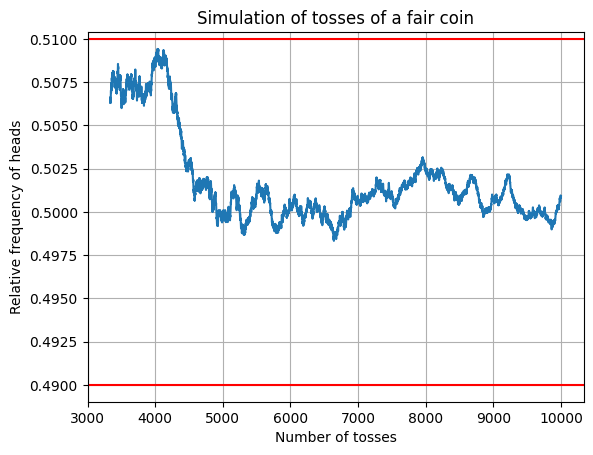

In [58]:
# Problem: Simulate N tosses of a fair coin and plot the relative frequencies
import numpy as np
import matplotlib.pyplot as plt

def simu_coin_tosses(N = 10000):
    cum_re = [0] * N # cumulative results
    prop_re = [0] * N
    popu = np.arange(2) # array([0, 1])
    the_sample = np.random.choice(popu, size = N, replace = True)
    cum_re[0] = the_sample[0]
    prop_re[0] = cum_re[0]
    for i in range(1, N):
        cum_re[i] = cum_re[i - 1] + the_sample[i]
        prop_re[i] = cum_re[i] / (i + 1)
    start = N//3       
    x = np.arange(start, N)       
    plt.plot(x, prop_re[start:N])
    epsi = 1 / np.sqrt(N)
    plt.axhline(0.5 - epsi, color = "red") # lower limit line
    plt.axhline(0.5 + epsi, color = "red") # upper limit line
    plt.xlabel("Number of tosses")
    plt.ylabel("Relative frequency of heads")
    plt.title("Simulation of tosses of a fair coin")
    plt.grid(True)
    plt.show()

## test
simu_coin_tosses(10000)

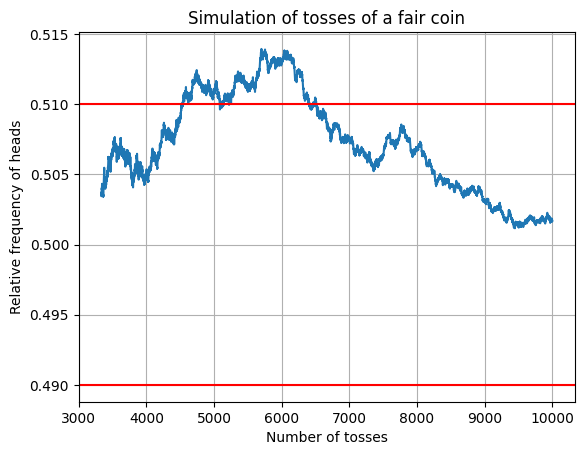

In [59]:
simu_coin_tosses(10000)

## Birthday problem

In [60]:
# Problem: Find the the answer to the birthday problem (https://en.wikipedia.org/wiki/Birthday_problem) by simulation.
import numpy as np

def simu_birthday_problem(N = 10000, people_number = 23):
    indicator = [0] * N
    a = np.arange(365) # array([0, 1, ..., 364])
    for i in range(N):
        a_sample = np.random.choice(a, size = people_number, replace = True)
        b = set(a_sample)
        if len(a_sample) > len(b):
            indicator[i] = 1
    the_result = sum(indicator) / N
    return the_result # accuracy: +- 0.01 with 95% confidence

## test
for i in range(5) :
    print(simu_birthday_problem(10000, 23))

0.5093
0.5062
0.5109
0.5071
0.5066
